# ML assignment 3 Unsupervised Learning

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [1]:
%run ./ML_a3_Functions.ipynb

In [2]:
#load data
nrows = 5000
df = pd.read_csv('Base.csv', nrows = nrows) 
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.3,0.872167,-1,95,30,0.036085,-0.852122,AB,697,...,0,500.0,0,INTERNET,3.700913,other,1,1,0,7
4996,0,0.9,0.885476,-1,18,20,0.027343,-1.287176,AD,2780,...,0,200.0,0,INTERNET,11.493372,other,1,1,0,7
4997,0,0.7,0.376199,-1,36,40,0.021229,-1.707717,AC,802,...,0,200.0,0,INTERNET,11.229699,linux,0,1,0,7
4998,0,0.1,0.588819,101,144,30,0.029976,-1.160380,AB,586,...,0,200.0,0,INTERNET,3.042368,windows,1,1,0,7


In [3]:
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
X_train, X_valid, X_test = std_scale(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)

In [4]:
X_train

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,-0.290382,1.898686,-0.026594,-0.619839,0.417815,-0.122764,-0.255025,0.200180,1.855815,0.581888,...,-0.694877,-0.199088,-0.340807,0.073081,-0.073081,1.570655,-0.239065,-0.657578,-0.736321,-0.063868
1,-1.076750,-0.919797,-0.308555,-0.688076,-1.137450,-0.123276,-0.216202,-0.892128,-0.970645,-1.130819,...,1.439103,-0.199088,-0.340807,0.073081,-0.073081,-0.636677,-0.239065,-0.657578,1.358103,-0.063868
2,-1.076750,-0.919797,-0.308555,-0.688076,-1.137450,-0.123276,-0.216202,-0.892128,-0.970645,-1.130819,...,-0.694877,-0.199088,-0.340807,0.073081,-0.073081,-0.636677,-0.239065,-0.657578,1.358103,-0.063868
3,-0.552505,-0.149303,0.511695,-0.647134,0.417815,-0.121460,2.711263,0.233406,-0.147654,0.442069,...,1.439103,-0.199088,-0.340807,0.073081,-0.073081,1.570655,-0.239065,-0.657578,-0.736321,-0.063868
4,0.758107,-0.260749,2.485420,-0.633486,0.936237,-0.120274,-0.299368,0.864702,0.118844,0.506109,...,-0.694877,-0.199088,-0.340807,0.073081,-0.073081,1.570655,-0.239065,-0.657578,-0.736321,-0.063868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,1.020230,0.435919,-0.334188,0.990553,0.417815,-0.122336,-0.254123,0.378770,0.211723,0.418367,...,-0.694877,-0.199088,2.934214,0.073081,-0.073081,-0.636677,-0.239065,1.520733,-0.736321,-0.063868
4568,-0.290382,0.073095,1.742069,-0.606191,0.936237,-0.121522,-0.278064,-0.450498,0.651322,2.426792,...,-0.694877,-0.199088,-0.340807,0.073081,-0.073081,-0.636677,-0.239065,-0.657578,1.358103,-0.063868
4569,1.020230,-0.770050,-0.334188,-0.578897,1.454659,-0.122984,-0.298061,0.698572,1.239030,0.270314,...,-0.694877,5.022898,-0.340807,0.073081,-0.073081,-0.636677,-0.239065,-0.657578,1.358103,-0.063868
4570,1.020230,0.435919,-0.334188,0.990553,0.417815,-0.122336,-0.254123,0.378770,0.211723,0.418367,...,-0.694877,-0.199088,2.934214,0.073081,-0.073081,-0.636677,-0.239065,1.520733,-0.736321,-0.063868


In [5]:
df_time = pd.DataFrame()
nn_final=pd.DataFrame()

In [6]:
def gen_op(name, time, y_train, labels):
#     df_time.loc[i] = [name, 
#                       np.round(time,3),
#                       np.round(f1_score(y_train,labels),3),
#                       np.round(roc_auc_score(y_train,labels),3)
#                      ]
    dfg = pd.DataFrame({'name':[name],
                         'time':[ np.round(time,3)],
                         'f1_score':[np.round(f1_score(y_train,labels, average='weighted'),3)],                
                         'roc_score':[np.round(roc_auc_score(y_train,labels),3)]
                        })
    return dfg
    
def transform_list(lst):
#     ones_count = sum(lst)
#     zeros_count = len(lst) - ones_count
#     if ones_count > zeros_count:
#         return [0 if x == 1 else 1 for x in lst]
#     else:
#         return [1 if x == 1 else 0 for x in lst]
    dft = pd.DataFrame({'target': lst})
    cc=dft.target.value_counts(ascending=False)
    ccmap = {cc.index[i]: i for i in range(len(cc))}
    dft = dft.target.map(ccmap)
    return dft    
    
def run_nn(name, X_t, new_label, y_train, X_test, test_label, y_test):
    mlp =  MLPClassifier(random_state = 0, 
                     hidden_layer_sizes=(3,), 
                     activation='identity')
    X_t = pd.DataFrame(X_t)
    X_t['cluster'] = new_label
    X_t.columns = X_t.columns.astype(str)
    X_test['cluster'] = test_label
    X_test.columns = X_test.columns.astype(str)
    mlp.fit(X_t, y_train)
    nn_perf = model(mlp, X_t, y_train, X_test, y_test)
    nn_perf['name'] = name
    print(nn_perf)
    return nn_perf

# Clustering

## Kmeans

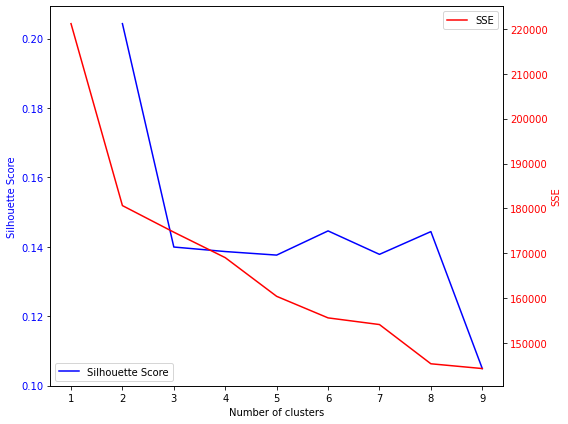

label       0     1
cluster            
0        1107  2286
1        1179     0


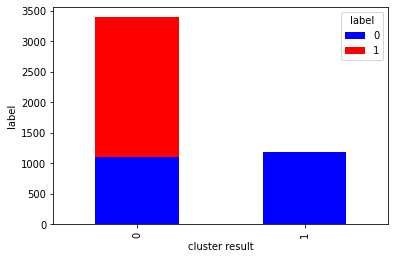

In [7]:
name = 'kmeans'
# pick k
plot_kmeans(X_train)

# model
k = 2
t_start = process_time()
kmeans_labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_train)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
plot_cluster_label(kmeans_labels, y_train)

In [8]:
df_time

,name,time,f1_score,roc_score
0,kmeans,0.016,0.195,0.242


## Expectation Maximization

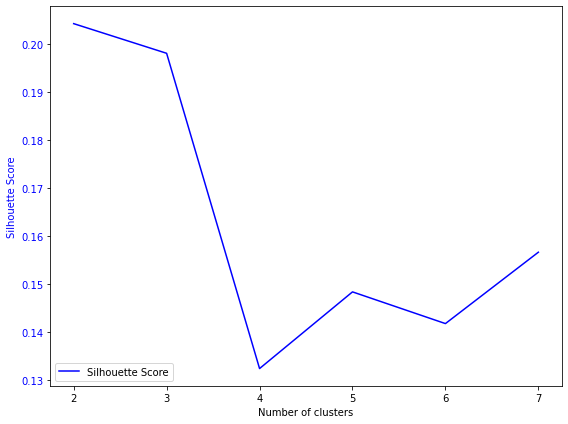

label       0     1
cluster            
0        1107  2286
1        1179     0


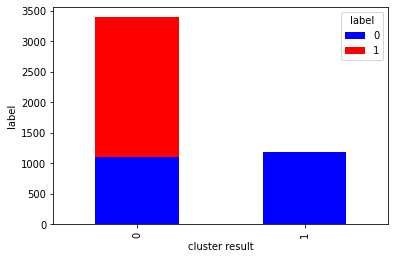

In [9]:
name = 'em'
# pick n
plot_em(X_train)

# model
t_start = process_time()
n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_train)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
plot_cluster_label(em_labels, y_train)

In [10]:
df_time

,name,time,f1_score,roc_score
0,kmeans,0.016,0.195,0.242
0,em,0.641,0.195,0.242


# Dimensional Reduction

## PCA

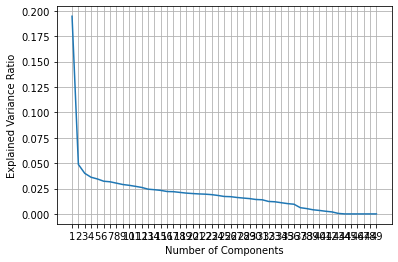

Total number of feature is:  49
Number of components needed to explain at least 75% of the variance: 21
Total variance explained by 21 components: 0.76


In [11]:
# Fit PCA on the training data
pca = PCA()
pca.fit(X_train)

# print(pca.explained_variance_ratio_)
# Plot the explained variance ratio for each component
import matplotlib.pyplot as plt
# pca.explained_variance_ratio_ = pca.explained_variance_ratio_[0:10]
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
plt.show()

# Choose the number of components that explain at least 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.75) + 1
print('Total number of feature is: ', len(pca.explained_variance_ratio_))
print(f"Number of components needed to explain at least 75% of the variance: {n_components}")

# Get the total variance explained by the selected number of components
total_variance_explained = np.sum(pca.explained_variance_ratio_[:n_components])
print(f"Total variance explained by {n_components} components: {total_variance_explained:.2f}")

In [12]:
t_start = process_time()
pca_n = n_components
X_train_pca = pd.DataFrame(pca.transform(X_train)[:, :pca_n])
X_test2 = pd.DataFrame(pca.transform(X_test)[:, :pca_n])
X_t = X_train_pca.copy()
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

Total time:  0.0


### Kmeans pca

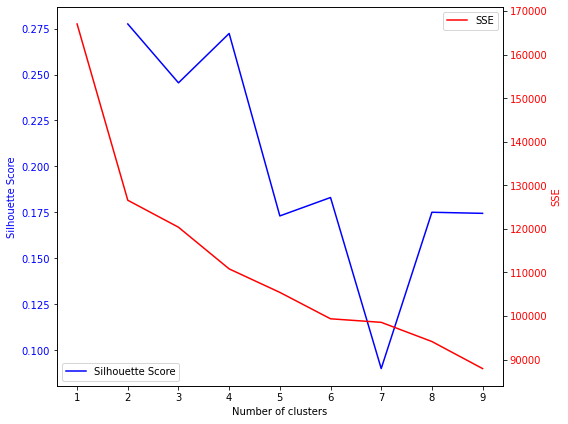

label       0     1
cluster            
0        1107  2286
1        1179     0


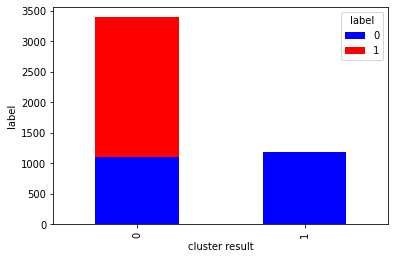

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.821     0.824      0.824     0.771         0.821     0.819   0.17188   

         name  
0  kmeans_pca  


In [13]:
name = 'kmeans_pca'

# pick k
plot_kmeans(X_t)

# model
k = 2
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### EM pca

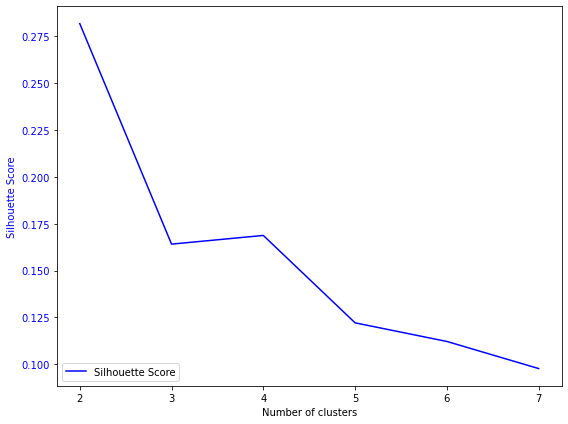

label       0     1
cluster            
0        1107  2286
1        1179     0


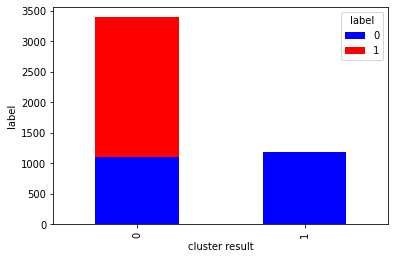

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.821     0.824      0.824     0.771         0.821     0.819    0.1875   

     name  
0  em_pca  


In [14]:
name = 'em_pca'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

## ICA

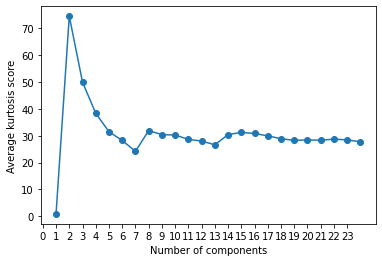

In [15]:
from scipy.stats import kurtosis
# Define the range of n_components to loop through
n_components_range = range(1, 25)
kur = []

# Loop through different values of n_components
for n_components in n_components_range:
    
    # Create an instance of the FastICA model with the current value of n_components
    ica = FastICA(n_components=n_components)

    # Fit the ICA model to the data and transform it
    ica_components = ica.fit_transform(X_train)

    # Compute the explained variance for the current value of n_components
    kur.append(mean(abs(kurtosis(ica_components))))

# Plot the explained variance as a function of the number of components
plt.plot(n_components_range, kur, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Average kurtosis score')
# plt.xticks(np.arange(len(kur)+1), np.arange(0, len(kur)+1))
plt.xticks(np.arange(len(kur)), np.arange(0, len(kur)))
plt.show()

In [16]:
# Create an instance of the FastICA model with 10 components
t_start = process_time()
ica_n = 14
ica = FastICA(n_components=ica_n)

# Fit the ICA model to the data
ica.fit(X_train)

# Transform the data using the ICA model
ica_components = ica.transform(X_train)
ica_components_test = ica.transform(X_test)
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)
# Create a new DataFrame with the ICA components
X_train_ica = pd.DataFrame(ica_components, columns=['ICA{}'.format(i+1) for i in range(ica_n)])
X_test2 = pd.DataFrame(ica_components_test, columns=['ICA{}'.format(i+1) for i in range(ica_n)])
X_t = X_train_ica.copy()

Total time:  0.03125


### Kmeans ica

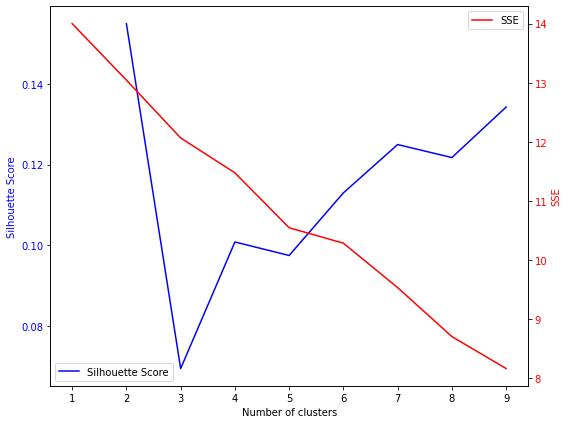

label       0     1
cluster            
0        1774  1903
1         512   383


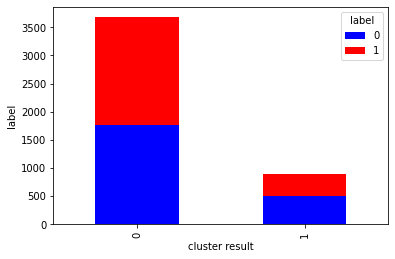

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.816     0.817       0.82     0.746         0.816      0.81   0.73438   

         name  
0  kmeans_ica  


In [17]:
name = 'kmeans_ica'

# pick k
plot_kmeans(X_t)

# model
k = 2
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### EM ica

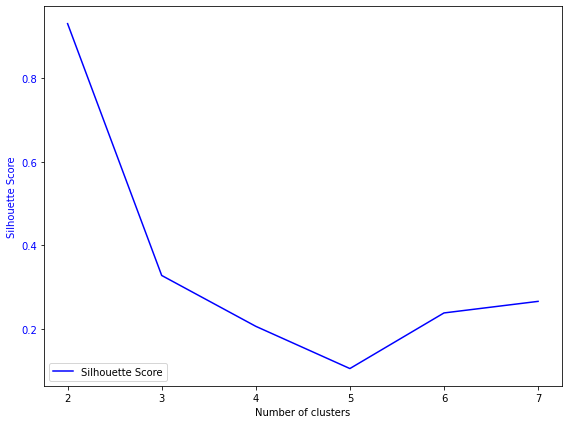

label       0     1
cluster            
0        1774  1903
1         512   383


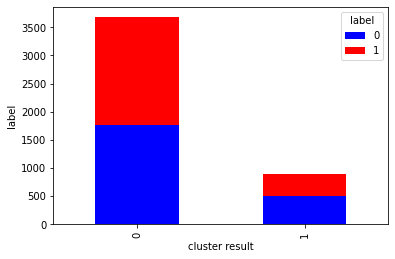

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.816     0.817       0.82     0.746         0.816      0.81   0.76562   

     name  
0  em_ica  


In [18]:
name = 'em_ica'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

## Randomized Projection

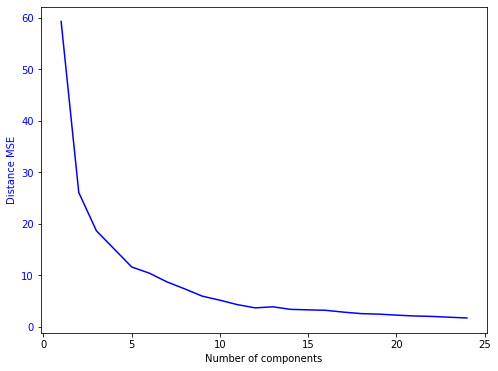

Total time:  0.0


In [19]:
n_components_range = range(1, 25)
dis=[]

from sklearn.metrics.pairwise import euclidean_distances
# Loop through different values of n_components
for n_components in n_components_range:
    # Perform randomized projection feature selection
#     rp = SparseRandomProjection(n_components=n_components, random_state=0)
    rp = GaussianRandomProjection(n_components=n_components, random_state=0)
    X_rp = rp.fit_transform(X_train)
    
    dist_original = euclidean_distances(X_train)
    dist_projected = euclidean_distances(X_rp)
    dis.append(((dist_original - dist_projected) ** 2).mean())

# Plot the scores for each k value
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'blue'
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Distance MSE', color=color)
ax1.plot(n_components_range, dis, label='Distance MSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.show()

# build model
t_start = process_time()
rp = SparseRandomProjection(n_components=13, random_state=0)
X_t = rp.fit_transform(X_train)
X_test2 = pd.DataFrame(rp.transform(X_test))
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

### Kmeans rp

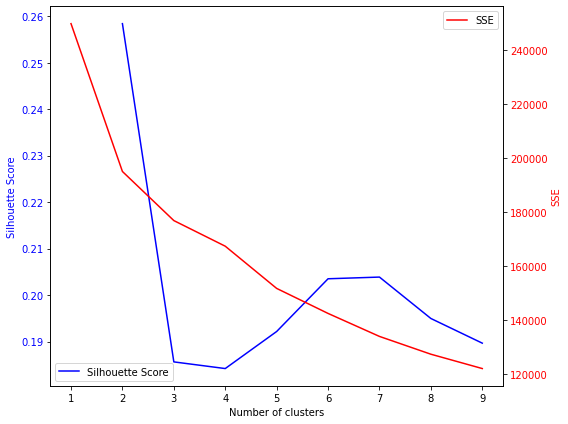

label       0     1
cluster            
0        1045  2177
1        1241   109


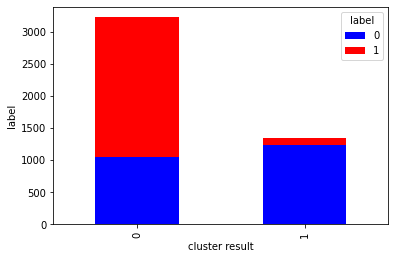

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.748      0.76      0.766     0.702         0.748      0.75   0.29688   

        name  
0  kmeans_rp  


In [20]:
name = 'kmeans_rp'

# pick k
plot_kmeans(X_t)

# model
k = 2
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

In [21]:
# nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, y_test))

In [22]:
# name = 'kmeans_rp7'

# # pick k
# plot_kmeans(X_t)

# # model
# k = 7
# t_start = process_time()
# kmeans_labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_t)
# kmeans_labels = transform_list(kmeans_labels)
# t_stop = process_time()
# t = t_stop - t_start
# df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# # print(t)
# plot_cluster_label(kmeans_labels, y_train)

In [23]:
# nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test, y_test))

### EM rp

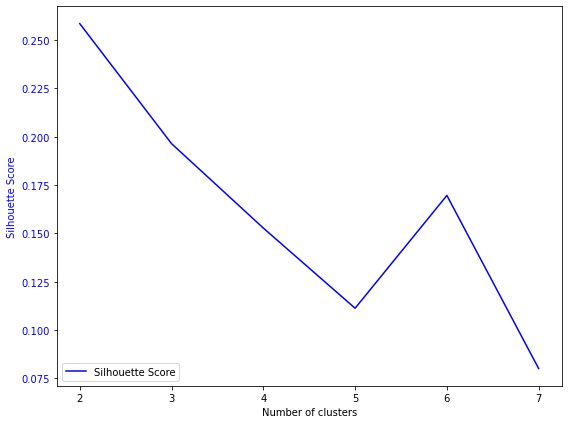

label       0     1
cluster            
0        1102  2245
1        1184    41


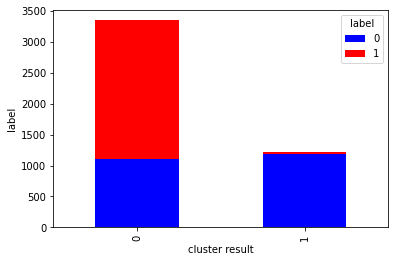

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.712      0.76      0.764     0.511         0.712     0.614   0.54688   

    name  
0  em_rp  


In [24]:
name = 'em_rp'
# pick n
plot_em(X_t)

# model
t_start = process_time()
n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

In [25]:
df_time

,name,time,f1_score,roc_score
0,kmeans,0.016,0.195,0.242
0,em,0.641,0.195,0.242
0,kmeans_pca,0.188,0.195,0.242
0,em_pca,0.078,0.195,0.242
0,kmeans_ica,0.109,0.418,0.472
0,em_ica,0.031,0.418,0.472
0,kmeans_rp,0.109,0.220,0.252
0,em_rp,0.250,0.207,0.250


## Factor Analysis

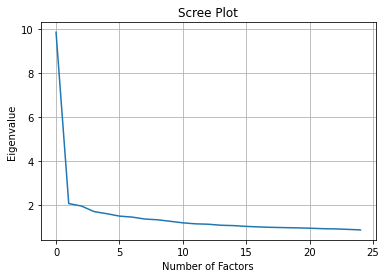

There 18 factors with a eigenvalue that greater than 1.


In [26]:
fa = FactorAnalyzer()
X_train_t = X_train.drop(columns=['device_fraud_count'])
fa.fit(X_train_t.values)

# Generate the scree plot
ev, v = fa.get_eigenvalues()
# plt.plot(range(1, X_train_t.shape[1]+1), ev)
plt.plot(range(0, 25), ev[0:25])
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
print('There {} factors with a eigenvalue that greater than 1.'.format(sum(ev>1)))

In [39]:
X_train_t = X_train.drop(columns=['device_fraud_count'])
X_test_t = X_test.drop(columns=['device_fraud_count'])
t_start = process_time()
fa = FactorAnalyzer(n_factors=18)
fa.fit(X_train_t.values)
X_t = fa.transform(X_train_t)
X_test2 = pd.DataFrame(fa.transform(X_test_t))
t_stop = process_time()
t = t_stop - t_start
print('Total time: ', t)

Total time:  0.171875


### kmeans factor analysis

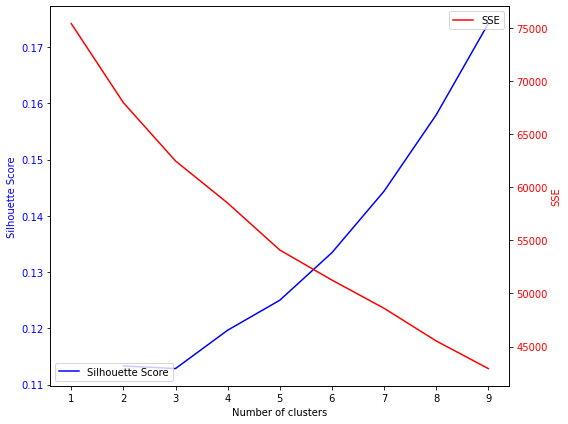

label       0     1
cluster            
0         637   815
1         295  1073
2        1000    43
3         346   335
4           8    20


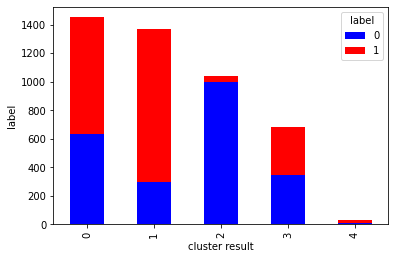

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.814     0.824      0.826     0.828         0.814     0.821   0.35938   

        name  
0  kmeans_fa  


In [28]:
name = 'kmeans_fa'

# pick k
plot_kmeans(X_t)

# model
k = 5
t_start = process_time()
km = KMeans(n_clusters=k, random_state=0)
kmeans_labels = km.fit_predict(X_t)
test_labels = km.fit_predict(X_test2)
kmeans_labels = transform_list(kmeans_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, kmeans_labels))
# print(t)
plot_cluster_label(kmeans_labels, y_train)
nn_final=nn_final.append(run_nn(name, X_t, kmeans_labels, y_train, X_test2, test_labels, y_test))

### em factor analysis

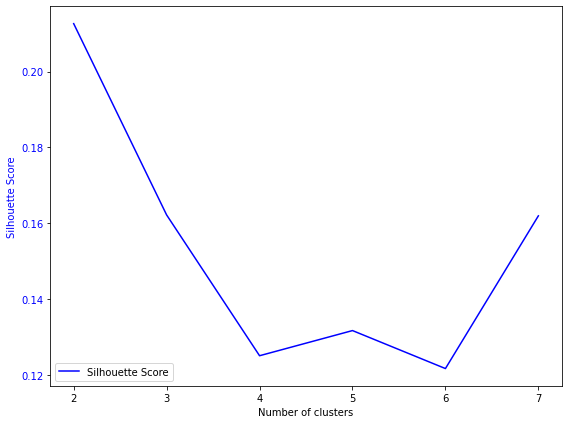

In [29]:
name = 'em_fa'
# pick n
plot_em(X_t)

label       0     1
cluster            
0        1961  1849
1         325   437


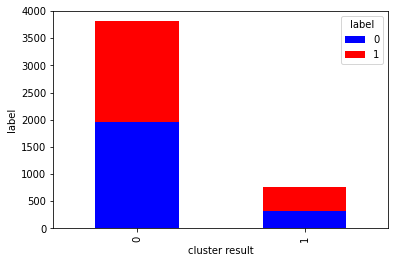

     acc  cv_score  train_roc  test_roc  recall_score  f1_score  run_time  \
0  0.758     0.823      0.826       0.8         0.758      0.77     0.375   

    name  
0  em_fa  


In [30]:
# model
t_start = process_time()

n = 2
em_labels = GaussianMixture(n_components=n).fit_predict(X_t)
em_labels = transform_list(em_labels)
t_stop = process_time()
t = t_stop - t_start
df_time = df_time.append(gen_op(name,t, y_train, em_labels))
# print(t)
plot_cluster_label(em_labels, y_train)

nn_final=nn_final.append(run_nn(name, X_t, em_labels, y_train, X_test2, test_labels, y_test))

In [32]:
'back propagation'
# train valid test split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df)
# feature engineering
X_train, X_valid, X_test = ohe(X_train, X_valid, X_test)
# oversampling
X_train, y_train = oversampling(X_train, y_train)
# model
mlp =  MLPClassifier(random_state = 0, 
                     hidden_layer_sizes=(3,), 
                     activation='identity')
mlp.fit(X_train, y_train)
nn_test_perf = model(mlp, X_train, y_train, X_test, y_test)
nn_test_perf['name'] = 'nn_backpropagation'
nn_test_perf

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.647,0.673,0.694,0.695,0.647,0.663,0.0625,nn_backpropagation


In [33]:
nn_final=nn_final.append(nn_test_perf)

In [40]:
df_time.sort_values('name', ascending=False)

,name,time,f1_score,roc_score
0,kmeans_rp,0.109,0.220,0.252
0,kmeans_pca,0.188,0.195,0.242
0,kmeans_ica,0.109,0.418,0.472
0,kmeans_fa,0.109,0.464,0.366
0,kmeans,0.016,0.195,0.242
0,em_rp,0.250,0.207,0.250
0,em_pca,0.078,0.195,0.242
0,em_ica,0.031,0.418,0.472
0,em_fa,0.375,0.465,0.524
0,em,0.641,0.195,0.242


In [41]:
nn_final.sort_values('f1_score', ascending=False)

,acc,cv_score,train_roc,test_roc,recall_score,f1_score,run_time,name
0,0.814,0.824,0.826,0.828,0.814,0.821,0.35938,kmeans_fa
0,0.821,0.824,0.824,0.771,0.821,0.819,0.17188,kmeans_pca
0,0.821,0.824,0.824,0.771,0.821,0.819,0.18750,em_pca
0,0.816,0.817,0.820,0.746,0.816,0.810,0.73438,kmeans_ica
0,0.816,0.817,0.820,0.746,0.816,0.810,0.76562,em_ica
0,0.758,0.823,0.826,0.800,0.758,0.770,0.37500,em_fa
0,0.748,0.760,0.766,0.702,0.748,0.750,0.29688,kmeans_rp
0,0.647,0.673,0.694,0.695,0.647,0.663,0.06250,nn_backpropagation
0,0.712,0.760,0.764,0.511,0.712,0.614,0.54688,em_rp


In [36]:
#check kur score and rerun